In [140]:
import pandas as pd
import nltk
from nltk.corpus import words
#nltk.download('words')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import requests
import json
import matplotlib.pyplot as plt
import os
dirpath = os.getcwd()


In [141]:
root_dirpath, py_script = os.path.split(dirpath)

In [142]:
df_sent_anita = pd.read_csv(root_dirpath + "/ChatLogs/ChatToAnalyse/sweet_anita/sweet_anita280123Clean.csv")
df_sent_denims = pd.read_csv(root_dirpath + "/ChatLogs/ChatToAnalyse/denims/denims280123Clean.csv")
df_sent_esfandtv = pd.read_csv(root_dirpath + "/ChatLogs/ChatToAnalyse/esfandtv/esfandtv280123Clean.csv")
df_sent_hanasabi = pd.read_csv(root_dirpath + "/ChatLogs/ChatToAnalyse/hanasabi/hasanabi280123Clean.csv")
df_sent_nmplol = pd.read_csv(root_dirpath + "/ChatLogs/ChatToAnalyse/nmplol/nmplol280123ver2Clean.csv")
df_sent_soda = pd.read_csv(root_dirpath + "/ChatLogs/ChatToAnalyse/sodapoppin/sodapoppin280123Clean.csv")
df_sent_xqc = pd.read_csv(root_dirpath + "/ChatLogs/ChatToAnalyse/xqc/xqc280123Clean.csv")

In [164]:
anita_words = ' '.join([i for i in df_sent_anita['Message']]).split()
denims_words = ' '.join([i for i in df_sent_denims['Message']]).split()
esfandtv_words = ' '.join([i for i in df_sent_esfandtv['Message']]).split()
hanasabi_words = ' '.join([i for i in df_sent_hanasabi['Message']]).split()
nmplol_words = ' '.join([i for i in df_sent_nmplol['Message']]).split()
soda_words = ' '.join([i for i in df_sent_soda['Message']]).split()
xqc_words = ' '.join([i for i in df_sent_xqc['Message']]).split()

In [146]:
# get emotes 
emotes = []

for page in range(1, 500):  
    url = f'https://api.frankerfacez.com/v1/emoticons?limit=50&page={page}'
    response = requests.get(url)
    data = json.loads(response.text)
    emotes.extend(data['emoticons'])

In [160]:
emotes_list=[]
for e in emotes:
    emotes_list.append(e["name"])
len(emotes_list)

24950

In [171]:
# fetch emotes 
emotes_anita = [word.lower() for word in anita_words if word in emotes_list]
emotes_denims = [word.lower() for word in denims_words if word in emotes_list]
emotes_esfandtv = [word.lower() for word in esfandtv_words if word in emotes_list]
emotes_hanasabi = [word.lower() for word in hanasabi_words if word in emotes_list]
emotes_nmplol = [word.lower() for word in nmplol_words if word in emotes_list]
emotes_soda = [word.lower() for word in soda_words if word in emotes_list]
emotes_xqc = [word.lower() for word in xqc_words if word in emotes_list]




print(set(emotes_xqc))

{'okay', 'hahaha', 'trueing', 'pls', 'glizzyl', 'pepehands', 'fishmoley', 'peepogiggle', 'what', 'failed', 'sex', 'huhh', 'lul', 'cocka', 'rat', 'widevibe', 'holy', 'now', 'winetime', 'omegalul', 'pagman', 'stop', 'megalul', 'pepepains', 'piss', 'forsencd', 'like', 'nice', 'pepega', 'monkaw', 'cock', 'classic', 'widepeepohappy', 'gachihyper', 'clueless', 'idk', 'clap', 'veryfors', 'scared', 'pepelaugh', 'wow', 'xqcll', 'wtf', 'scammed', 'aware', 'win', 'lol', 'modcheck', 'money', 'raid', 'gigachad', 'iii', 'booba', 'pogu', 'lule', 'monkax', 'lulw', 'despair', 'waytoodank', 'pagbounce', 'concerned', 'sad', 'earthquake', 'ayaya', 'dead', 'pagchomp', 'lethimcook', 'gg!', 'xqcl', 'sadge', 'pogo', 'ass', 'legs', 'rapthis', 'yep', 'feelsbadman', 'kappa', 'bruh', 'feelsdankman', 'remix', 'poggers', 'lmao', 'cool', 'trolldespair', 'yeah', 'ppl', 'pepemeltdown', 'kreygasm', 'enjoy', 'this', 'man', 'feelssnowman', 'why', 'nahh', 'forsene', 'monkas', 'zzz', 'mike', 'aintnoway', 'play', 'pog', 'ok

In [172]:
analyser = SentimentIntensityAnalyzer()

Added new_emotes to the Lexicon, these are emotes that are unique to only Twitch and its 3rd party

In [173]:
new_emotes = {'kekw' : 4.0, 
              'monkalaugh' : 0.0, 
              'weirdchamp' : -3.0,
              'awww' : 4.0,
              'lol' : 4.0,
              'feelsstrongman' : -4.0, 
              'pepog' :  0.0,
              'copium' : -3.0,
              'ome' : 2.0, 
              'sanic' : 1.0,
              'hopium' : -1.0,
              'idk' : 0.0,
              'gigachad' : 3.0,
              'widepeeposad' : -1.0,
              'madg' : -2.0,
              'ppl' : 0.0,
              'pogg' : 2.0,
              'comfi' : 0.0,
              'okaychamp' : -2.0,
              'hype' : 2.0,
              'feelsamazingman' : 3.0,
              'pepelaugh' : 2.0,
              'shirley' : 0.0,
              'yess' : 2.0,
              'pog' : 2.0,
              'kok' : 1.0,
              'noooo' : -2.0,
              '4head' : 0.0,
              'gachigasm' : 2.0,
              'strongge' : -1.0,
              'lmao' : 2.0,
              'hohoho' : 2.0,
              'ayo' : 0.0,
              'pagman' : -3.0,
              'monkahmm' : 0.0,
              'catjam' : 4.0,
              'grug' : -3.0,
              'frick' : -2.0,
              'vibe' : 1.0,
              'donksass' : -1.0,
              'monkaw' : -3.0,
              'waytoodank' : 4.0,
              'monkas' : -3.0,
              'lul' : 4.0,
              'sadge' : -3.0,
              'kreygasm' : 3.0,
              'clap' : 3.0,
              'pepega' : -2.0,
              'omegalul' : 2.0,
              'pogu' : 2.0,
              'feelsgoodman' : 3.0,
              'kappa' : -2.0,
              'lulw' : 2.0,
              'booba' : 2.0,
              'peeposad' : -3.0
              


              







}

In [174]:
analyser.lexicon.update(new_emotes)

Polarity scores compute

In [175]:
df_sent_anita['Message'] = df_sent_anita['Message'].str.lower()
df_sent_anita['Scores'] = df_sent_anita['Message'].apply(lambda x:analyser.polarity_scores(x))
df_sent_denims['Message'] = df_sent_denims['Message'].str.lower()
df_sent_denims['Scores'] = df_sent_denims['Message'].apply(lambda x:analyser.polarity_scores(x))
df_sent_esfandtv['Message'] = df_sent_esfandtv['Message'].str.lower()
df_sent_esfandtv['Scores'] = df_sent_esfandtv['Message'].apply(lambda x:analyser.polarity_scores(x))
df_sent_hanasabi['Message'] = df_sent_hanasabi['Message'].str.lower()
df_sent_hanasabi['Scores'] = df_sent_hanasabi['Message'].apply(lambda x:analyser.polarity_scores(x))
df_sent_nmplol['Message'] = df_sent_nmplol['Message'].str.lower()
df_sent_nmplol['Scores'] = df_sent_nmplol['Message'].apply(lambda x:analyser.polarity_scores(x))
df_sent_soda['Message'] = df_sent_soda['Message'].str.lower()
df_sent_soda['Scores'] = df_sent_soda['Message'].apply(lambda x:analyser.polarity_scores(x))
df_sent_xqc['Message'] = df_sent_xqc['Message'].str.lower()
df_sent_xqc['Scores'] = df_sent_xqc['Message'].apply(lambda x:analyser.polarity_scores(x))


In [176]:
pd.set_option('display.max_colwidth', 200)
df_sent_anita.tail(2)

,Date,Channel,Username,Message,Tag_owner,Cleanest_message,Scores
491,2023-01-29 01:58:35,sweet_anita,mabu_jpg,jamgi :honeybee:,0,honeybee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
492,2023-01-29 01:59:56,sweet_anita,iduhknowwhattoput,"i think most people don't want to work , so when they are locked in they have commitment and it give them motivation",0,want commit,"{'neg': 0.056, 'neu': 0.755, 'pos': 0.189, 'compound': 0.5445}"


Calculate the total sentiment polarity scores split between Negative, Neutral, and Positive.

In [177]:
total_anita = analyser.polarity_scores(df_sent_anita['Message'])
total_denims = analyser.polarity_scores(df_sent_denims['Message'])
total_esfandtv = analyser.polarity_scores(df_sent_esfandtv['Message'])
total_hanasabi = analyser.polarity_scores(df_sent_hanasabi['Message'])
total_nmplol = analyser.polarity_scores(df_sent_nmplol['Message'])
total_xqc = analyser.polarity_scores(df_sent_xqc['Message'])

In [178]:
print(total_xqc)

{'neg': 0.183, 'neu': 0.569, 'pos': 0.248, 'compound': 0.9999}


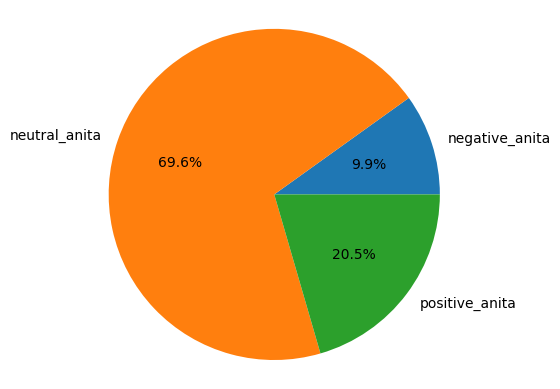

In [179]:
labels = ['negative_anita', 'neutral_anita', 'positive_anita']
sizes  = [total_anita['neg'], total_anita['neu'], total_anita['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # autopct='%1.1f%%' gives you percentages printed in every slice.
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()

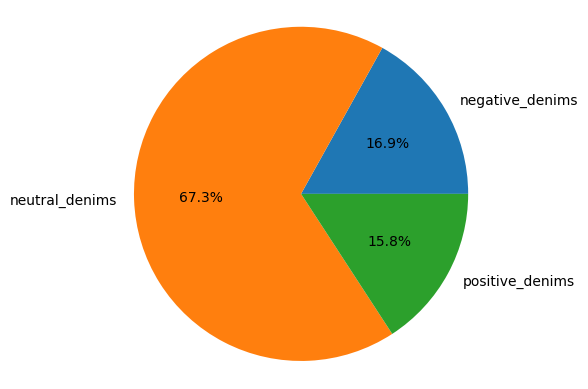

In [180]:
labels = ['negative_denims', 'neutral_denims', 'positive_denims']
sizes  = [total_denims['neg'], total_denims['neu'], total_denims['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # autopct='%1.1f%%' gives you percentages printed in every slice.
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()

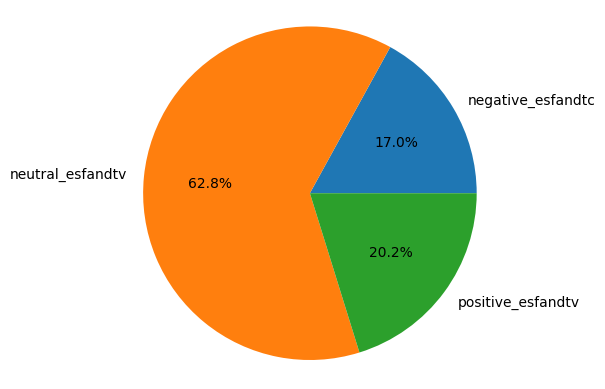

In [181]:
labels = ['negative_esfandtc', 'neutral_esfandtv', 'positive_esfandtv']
sizes  = [total_esfandtv['neg'], total_esfandtv['neu'], total_esfandtv['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # autopct='%1.1f%%' gives you percentages printed in every slice.
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()

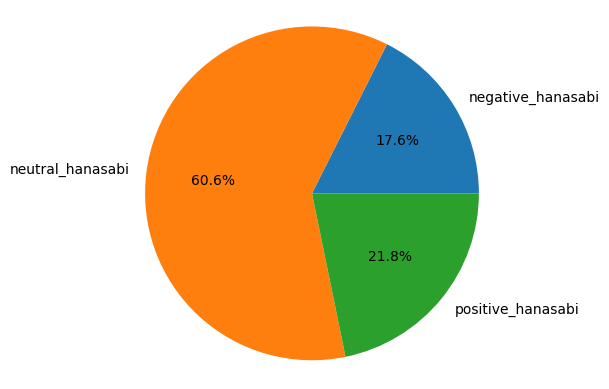

In [182]:
labels = ['negative_hanasabi', 'neutral_hanasabi', 'positive_hanasabi']
sizes  = [total_hanasabi['neg'], total_hanasabi['neu'], total_hanasabi['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # autopct='%1.1f%%' gives you percentages printed in every slice.
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()

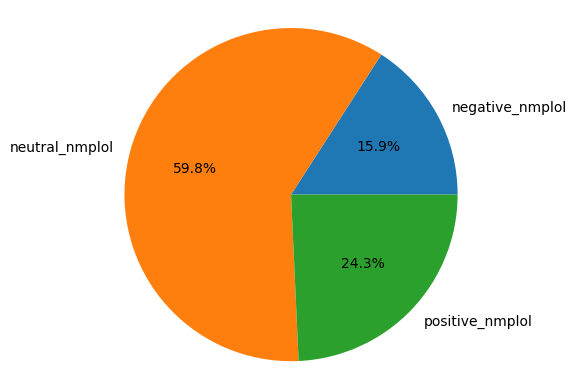

In [183]:
labels = ['negative_nmplol', 'neutral_nmplol', 'positive_nmplol']
sizes  = [total_nmplol['neg'], total_nmplol['neu'], total_nmplol['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # autopct='%1.1f%%' gives you percentages printed in every slice.
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()

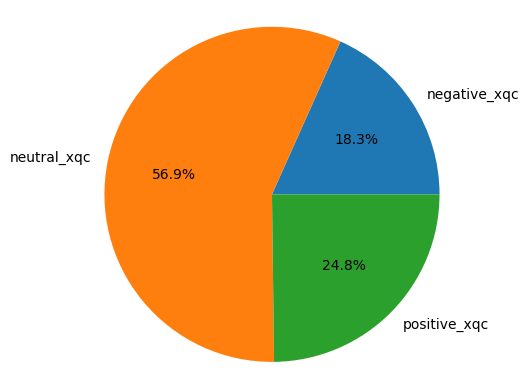

In [184]:
labels = ['negative_xqc', 'neutral_xqc', 'positive_xqc']
sizes  = [total_xqc['neg'], total_xqc['neu'], total_xqc['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # autopct='%1.1f%%' gives you percentages printed in every slice.
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()